In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import WhitespaceTokenizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [7]:
df_real=pd.read_csv('../FakeNewsDeepLearning/fakenewsnet/BuzzFeed_real_news_content.csv')

In [8]:
df_real.shape

(91, 12)

In [9]:
df_fake=pd.read_csv('../FakeNewsDeepLearning/fakenewsnet/BuzzFeed_fake_news_content.csv')

In [10]:
df_fake.shape

(91, 12)

In [11]:
df=pd.concat([df_real,df_fake],axis=0)

In [12]:
df.shape

(182, 12)

In [13]:
df['news_type']=df['id'].apply(lambda x: x.split('_')[0])

In [14]:
df.head(2)

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,news_type
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com/36942/another-terrorist...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Leonora Cravotta",http://eaglerising.com,{'$date': 1474528230000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36942/another-terrorist...,"{""description"": ""\u201cWe believe at this poin...",Real
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws/2d4lNn9,http://a.abcnews.com/images/Politics/AP_donald...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-dr...,"{""fb_title"": ""Trump: Drugs a 'Very, Very Big F...",Real


In [15]:
df.shape

(182, 13)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 90
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              182 non-null    object
 1   title           182 non-null    object
 2   text            182 non-null    object
 3   url             174 non-null    object
 4   top_img         172 non-null    object
 5   authors         141 non-null    object
 6   source          174 non-null    object
 7   publish_date    133 non-null    object
 8   movies          25 non-null     object
 9   images          172 non-null    object
 10  canonical_link  170 non-null    object
 11  meta_data       182 non-null    object
 12  news_type       182 non-null    object
dtypes: object(13)
memory usage: 19.9+ KB


In [17]:
df.describe()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,news_type
count,182,182,182,174,172,141,174,133,25,172,170,182,182
unique,182,178,178,171,166,90,28,118,25,169,168,171,2
top,Fake_14-Webpage,A Hillary Clinton Administration May be Entire...,We’re shocked — SHOCKED — to learn that CNN’s ...,http://eaglerising.com/36847/clinton-foundatio...,http://static.politico.com/da/f5/44342c424c68b...,Terresa Monroe-hamilton,http://politi.co,{'$date': 1474588800000},https://www.youtube.com/embed/wkQIvgWpIDc?feat...,http://static.politico.com/da/f5/44342c424c68b...,http://eaglerising.com/36880/a-hillary-clinton...,{},Fake
freq,1,2,2,2,3,8,32,5,1,2,2,8,91


In [18]:
df.drop(['id','url', 'top_img','authors','publish_date','canonical_link','meta_data'],axis=1, inplace=True)

In [19]:
df.isnull().sum()

title          0
text           0
source         8
movies       157
images        10
news_type      0
dtype: int64

In [20]:
(df.isnull().sum())/(df.shape[0])*100

title         0.000000
text          0.000000
source        4.395604
movies       86.263736
images        5.494505
news_type     0.000000
dtype: float64

In [21]:
df['contain_movies']=df['movies'].apply(lambda x: 0 if str(x)=='nan' else 1)

In [22]:
df['contain_images']=df['images'].apply(lambda x: 0 if str(x)=='nan' else 1)

In [23]:
df.drop(['movies','images'],axis=1,inplace=True)

In [24]:
df.head(2)

,title,text,source,news_type,contain_movies,contain_images
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com,Real,0,1
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws,Real,0,1


## EDA

In [25]:
real_order=df[df['news_type']=='Real']['source'].value_counts().sort_values(ascending=False).index

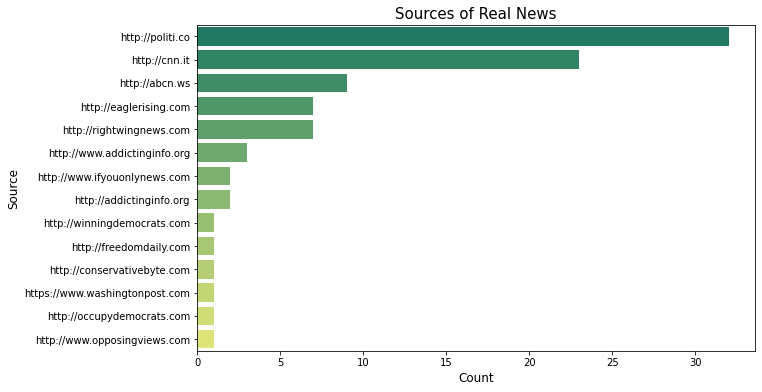

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(y='source', data=df[df['news_type']=='Real'],order=real_order,palette='summer')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Sources of Real News',fontsize=15)
plt.show()

In [27]:
fake_order=df[df['news_type']=='Fake']['source'].value_counts().sort_values(ascending=False).index

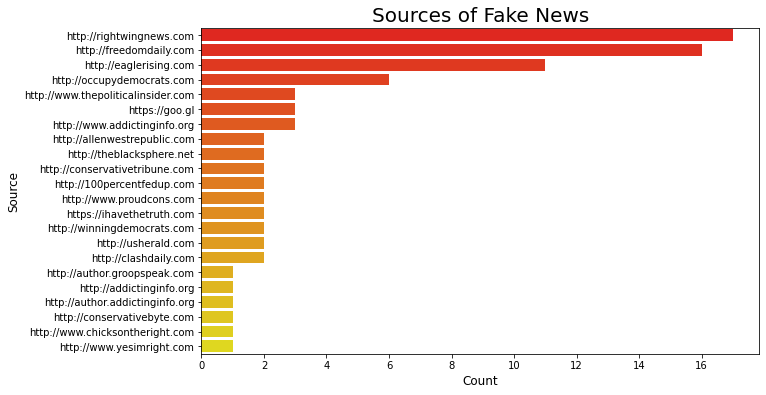

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(y='source',data=df[df['news_type']=='Fake'],order=fake_order,palette='autumn')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Sources of Fake News',fontsize=20)
plt.show()

In [29]:
new=[]
for x in df[df['news_type']=='Fake']['source'].unique():
    if x in df[df['news_type']=='Real']['source'].unique():
        new.append(x)
print(new)

['http://www.addictinginfo.org', 'http://eaglerising.com', 'http://conservativebyte.com', 'http://winningdemocrats.com', 'http://freedomdaily.com', 'http://occupydemocrats.com', 'http://rightwingnews.com', 'http://addictinginfo.org']


In [30]:
df['common']=df['source'].apply(lambda x: x if x in new else 0)

In [31]:
df1=df[df['common']!=0]

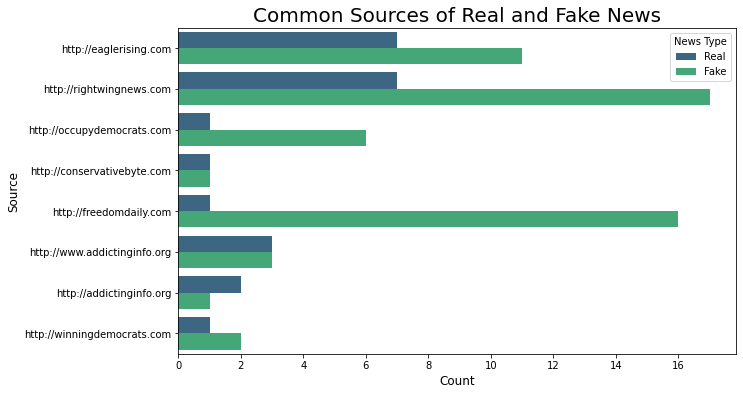

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(y='common',data=df1,hue='news_type',palette='viridis')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.legend(loc='best', title='News Type',fontsize=10)
plt.title('Common Sources of Real and Fake News',fontsize=20)
plt.show()

In [33]:
df.head(2)

,title,text,source,news_type,contain_movies,contain_images,common
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com,Real,0,1,http://eaglerising.com
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws,Real,0,1,0


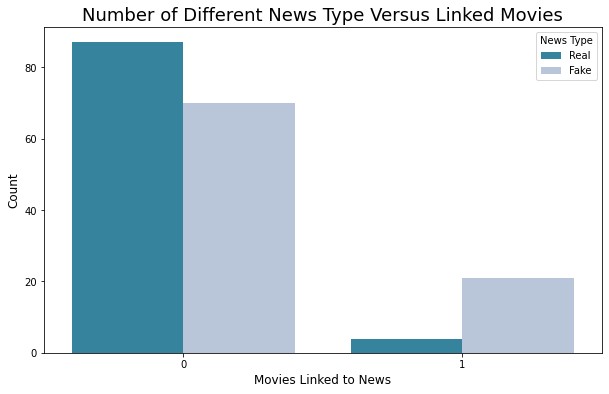

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='contain_movies', data=df, hue='news_type', palette='PuBuGn_r')
plt.xlabel('Movies Linked to News',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(loc='best', title='News Type',fontsize=10)
plt.title('Number of Different News Type Versus Linked Movies',fontsize=18)
plt.show()

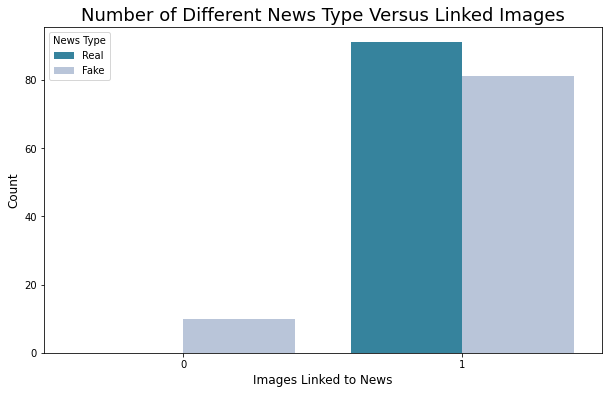

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='contain_images', data=df, hue='news_type', palette='PuBuGn_r')
plt.xlabel('Images Linked to News',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(loc='upper left', title='News Type',fontsize=10)
plt.title('Number of Different News Type Versus Linked Images',fontsize=18)
plt.show()

### Analysis of Title and Body of News Articles

In [36]:
ps=PorterStemmer()
wst= WhitespaceTokenizer() 

##### 1. Converting text to lower case
def lower_func (x):
    return x.lower()


##### 2. Removing Numbers from the text corpus
def remove_number_func (x): 
    new=""
    for a in x:
        if a.isdigit()==False:
            new=new+a
    return new


##### 3. Removing punctuation 
def remove_punc_func(x):
    new=''
    for a in x:
        if a not in string.punctuation:
            new=new+a
    return new

##### 4. Removing special characters
def remove_spec_char_func(x):
    new=''
    for a in x:
        if (a.isalnum()==True) or (a==' '):
            new=new+a
    return(new)

##### 5. Removing english stopwords
def remove_stopwords(x):
    new=[]
    for a in x.split():
        if a not in stopwords.words('english'):
            new.append(a)
    return " ".join(new)

##### 6. Stemming words to root words
def stem_func(x):
    wordlist = word_tokenize(x)
    psstem = [ps.stem(a) for a in wordlist]
    return ' '.join(psstem)

##### 7. Removing extra whitespaces 
def remove_whitespace_func(x):
    return(wst.tokenize(x))

def compose(f, g):
    return lambda x: f(g(x))

final=compose(compose(compose(compose(compose(compose(remove_whitespace_func,stem_func),remove_stopwords),remove_spec_char_func),remove_punc_func),remove_number_func),lower_func)

##### Fake News

In [37]:
df_fake=df[df['news_type']=='Fake']

In [38]:
cv1 = CountVectorizer(analyzer=final)
cv1.fit(df_fake['title'])
bow1=cv1.transform(df_fake['title'])

In [39]:
pd.DataFrame(bow1.todense()).shape

(91, 459)

In [40]:
new1=[]
for x in range(0,459):
    new1.append(cv1.get_feature_names()[x])

In [41]:
matrix1=pd.DataFrame(bow1.todense(),columns=new1)

In [42]:
sm1=[]
for x in new1:
    sm1.append(matrix1[x].sum())

In [43]:
trans1=matrix1.transpose()

In [44]:
trans1['sum']=sm1

In [45]:
top1=trans1.sort_values(by='sum', ascending=False).head(20)

##### Real News

In [46]:
df_real=df[df['news_type']=='Real']

In [47]:
cv2 = CountVectorizer(analyzer=final)
cv2.fit(df_real['title'])
bow2=cv2.transform(df_real['title'])

In [48]:
pd.DataFrame(bow2.todense()).shape

(91, 436)

In [49]:
new2=[]
for x in range(0,436):
    new2.append(cv2.get_feature_names()[x])

In [50]:
matrix2=pd.DataFrame(bow2.todense(),columns=new2)

In [51]:
sm2=[]
for x in new2:
    sm2.append(matrix2[x].sum())

In [52]:
trans2=matrix2.transpose()

In [53]:
trans2['sum']=sm2

In [54]:
top2=trans2.sort_values(by='sum', ascending=False).head(20)

##### Concatenation

In [55]:
top1.drop(list(range(0,91)),axis=1,inplace=True)

In [56]:
top1['type']=['Fake']*20

In [57]:
top2.drop(list(range(0,91)),axis=1,inplace=True)

In [58]:
top2['type']=['Real']*20

In [59]:
conc1=pd.concat([top1,top2])

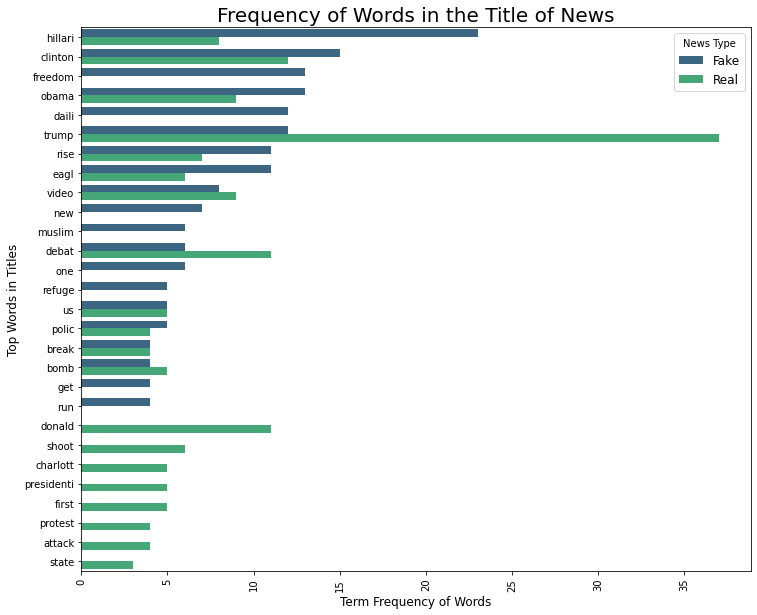

In [60]:
plt.figure(figsize=(12,10))
sns.barplot(y=conc1.index,x='sum',data=conc1,hue='type',palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Term Frequency of Words',fontsize=12)
plt.ylabel('Top Words in Titles',fontsize=12)
plt.legend(title='News Type',fontsize=12)
plt.title('Frequency of Words in the Title of News',fontsize=20)
plt.show()

#### Analysis of News Body

##### Fake News

In [61]:
cv3 = CountVectorizer(analyzer=final)
cv3.fit(df_fake['text'])
bow3=cv3.transform(df_fake['text'])

In [62]:
pd.DataFrame(bow3.todense()).shape

(91, 4958)

In [63]:
new3=[]
for x in range(0,4958):
    new3.append(cv3.get_feature_names()[x])

In [64]:
matrix3=pd.DataFrame(bow3.todense(),columns=new3)

In [65]:
sm3=[]
for x in new3:
    sm3.append(matrix3[x].sum())

In [66]:
trans3=matrix3.transpose()

In [67]:
trans3['sum']=sm3

In [68]:
top3=trans3.sort_values(by='sum', ascending=False).head(30)

##### Real News

In [69]:
cv4 = CountVectorizer(analyzer=final)
cv4.fit(df_real['text'])
bow4=cv4.transform(df_real['text'])

In [70]:
pd.DataFrame(bow4.todense()).shape

(91, 6529)

In [71]:
new4=[]
for x in range(0,6529):
    new4.append(cv4.get_feature_names()[x])

In [72]:
matrix4=pd.DataFrame(bow4.todense(),columns=new4)

In [73]:
sm4=[]
for x in new4:
    sm4.append(matrix4[x].sum())

In [74]:
trans4=matrix4.transpose()

In [75]:
trans4['sum']=sm4

In [76]:
top4=trans4.sort_values(by='sum', ascending=False).head(30)

##### Concatenation

In [77]:
top3.drop(list(range(0,91)),axis=1,inplace=True)

In [78]:
top3['type']=['Fake']*30

In [79]:
top4.drop(list(range(0,91)),axis=1,inplace=True)

In [80]:
top4['type']=['Real']*30

In [81]:
conc2=pd.concat([top3,top4])

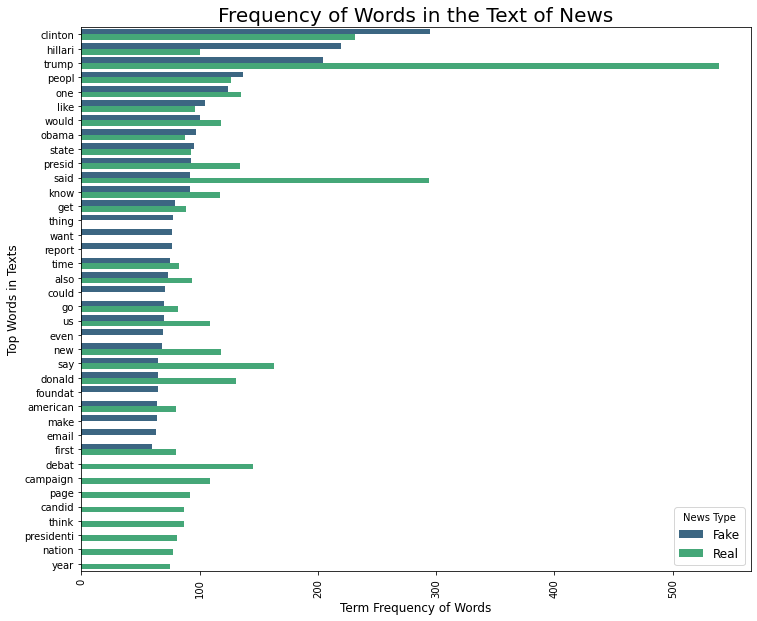

In [82]:
plt.figure(figsize=(12,10))
sns.barplot(y=conc2.index,x='sum',data=conc2,hue='type',palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Term Frequency of Words',fontsize=12)
plt.ylabel('Top Words in Texts',fontsize=12)
plt.legend(title='News Type',fontsize=12,loc='lower right')
plt.title('Frequency of Words in the Text of News',fontsize=20)
plt.show()

#### Analysis of Title Length

In [83]:
df['title_length']=df['title'].apply(lambda x: len(x))

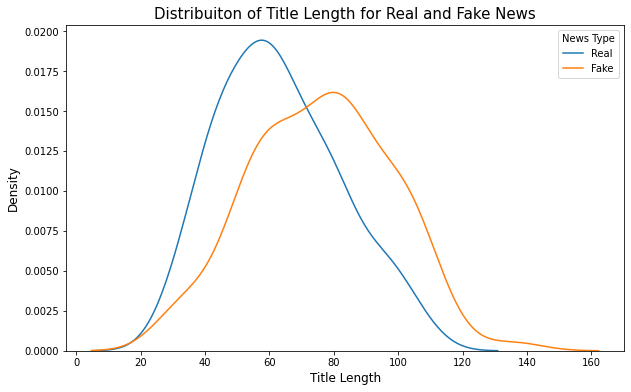

In [84]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['news_type']=='Real']['title_length'])
sns.kdeplot(df[df['news_type']=='Fake']['title_length'])
plt.xlabel('Title Length',fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.legend(title='News Type',fontsize=10,labels=['Real','Fake'])
plt.title('Distribuiton of Title Length for Real and Fake News',fontsize=15)
plt.show()

## Fake/Real News Classification

In [85]:
X1=df['text']
y1=df['news_type']

In [86]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [87]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [88]:
pp.fit(X1_train,y1_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fd89571d7b8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [89]:
predictions1=pp.predict(X1_test)

In [90]:
print(confusion_matrix(y1_test, predictions1))
print('\n')
print(classification_report(y1_test, predictions1))

[[19  7]
 [ 8 21]]


              precision    recall  f1-score   support

        Fake       0.70      0.73      0.72        26
        Real       0.75      0.72      0.74        29

    accuracy                           0.73        55
   macro avg       0.73      0.73      0.73        55
weighted avg       0.73      0.73      0.73        55



In [91]:
pp=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [92]:
pp.fit(X1_train,y1_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [93]:
predictions2=pp.predict(X1_test)

In [94]:
print(confusion_matrix(y1_test, predictions2))
print('\n')
print(classification_report(y1_test, predictions2))

[[18  8]
 [ 7 22]]


              precision    recall  f1-score   support

        Fake       0.72      0.69      0.71        26
        Real       0.73      0.76      0.75        29

    accuracy                           0.73        55
   macro avg       0.73      0.73      0.73        55
weighted avg       0.73      0.73      0.73        55



In [95]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [96]:
pp.fit(X1_train,y1_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fd89571d7b8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [97]:
predictions3=pp.predict(X1_test)

In [98]:
print(confusion_matrix(y1_test, predictions3))
print('\n')
print(classification_report(y1_test, predictions3))

[[22  4]
 [13 16]]


              precision    recall  f1-score   support

        Fake       0.63      0.85      0.72        26
        Real       0.80      0.55      0.65        29

    accuracy                           0.69        55
   macro avg       0.71      0.70      0.69        55
weighted avg       0.72      0.69      0.69        55



In [99]:
pp=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [100]:
pp.fit(X1_train,y1_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [101]:
predictions4=pp.predict(X1_test)

In [102]:
print(confusion_matrix(y1_test, predictions4))
print('\n')
print(classification_report(y1_test, predictions4))

[[25  1]
 [17 12]]


              precision    recall  f1-score   support

        Fake       0.60      0.96      0.74        26
        Real       0.92      0.41      0.57        29

    accuracy                           0.67        55
   macro avg       0.76      0.69      0.65        55
weighted avg       0.77      0.67      0.65        55



In [103]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

In [104]:
pp.fit(X1_train,y1_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fd89571d7b8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [105]:
predictions5=pp.predict(X1_test)

In [106]:
print(confusion_matrix(y1_test, predictions5))
print('\n')
print(classification_report(y1_test, predictions5))

[[20  6]
 [ 5 24]]


              precision    recall  f1-score   support

        Fake       0.80      0.77      0.78        26
        Real       0.80      0.83      0.81        29

    accuracy                           0.80        55
   macro avg       0.80      0.80      0.80        55
weighted avg       0.80      0.80      0.80        55



In [107]:
pp=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

In [108]:
pp.fit(X1_train,y1_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [109]:
predictions6=pp.predict(X1_test)

In [110]:
print(confusion_matrix(y1_test, predictions6))
print('\n')
print(classification_report(y1_test, predictions6))

[[22  4]
 [ 4 25]]


              precision    recall  f1-score   support

        Fake       0.85      0.85      0.85        26
        Real       0.86      0.86      0.86        29

    accuracy                           0.85        55
   macro avg       0.85      0.85      0.85        55
weighted avg       0.85      0.85      0.85        55



### Fake/Real News Detection Based on News Title

In [111]:
X2=df['title']
y2=df['news_type']

In [112]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [113]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [114]:
pp.fit(X2_train,y2_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fd89571d7b8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [115]:
predictions7=pp.predict(X2_test)

In [116]:
print(confusion_matrix(y2_test, predictions7))
print('\n')
print(classification_report(y2_test, predictions7))

[[20  6]
 [13 16]]


              precision    recall  f1-score   support

        Fake       0.61      0.77      0.68        26
        Real       0.73      0.55      0.63        29

    accuracy                           0.65        55
   macro avg       0.67      0.66      0.65        55
weighted avg       0.67      0.65      0.65        55



In [117]:
pp=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [118]:
pp.fit(X2_train,y2_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [119]:
predictions8=pp.predict(X2_test)

In [120]:
print(confusion_matrix(y2_test, predictions8))
print('\n')
print(classification_report(y2_test, predictions8))

[[17  9]
 [11 18]]


              precision    recall  f1-score   support

        Fake       0.61      0.65      0.63        26
        Real       0.67      0.62      0.64        29

    accuracy                           0.64        55
   macro avg       0.64      0.64      0.64        55
weighted avg       0.64      0.64      0.64        55



In [121]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [122]:
pp.fit(X2_train,y2_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fd89571d7b8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [123]:
predictions9=pp.predict(X2_test)

In [124]:
print(confusion_matrix(y2_test, predictions9))
print('\n')
print(classification_report(y2_test, predictions9))

[[21  5]
 [17 12]]


              precision    recall  f1-score   support

        Fake       0.55      0.81      0.66        26
        Real       0.71      0.41      0.52        29

    accuracy                           0.60        55
   macro avg       0.63      0.61      0.59        55
weighted avg       0.63      0.60      0.59        55



In [125]:
pp=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [126]:
pp.fit(X2_train,y2_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [127]:
predictions10=pp.predict(X2_test)

In [128]:
print(confusion_matrix(y2_test, predictions10))
print('\n')
print(classification_report(y2_test, predictions10))

[[22  4]
 [19 10]]


              precision    recall  f1-score   support

        Fake       0.54      0.85      0.66        26
        Real       0.71      0.34      0.47        29

    accuracy                           0.58        55
   macro avg       0.63      0.60      0.56        55
weighted avg       0.63      0.58      0.56        55



In [129]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

In [130]:
pp.fit(X2_train,y2_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fd89571d7b8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [131]:
predictions11=pp.predict(X2_test)

In [132]:
print(confusion_matrix(y2_test, predictions11))
print('\n')
print(classification_report(y2_test, predictions11))

[[20  6]
 [15 14]]


              precision    recall  f1-score   support

        Fake       0.57      0.77      0.66        26
        Real       0.70      0.48      0.57        29

    accuracy                           0.62        55
   macro avg       0.64      0.63      0.61        55
weighted avg       0.64      0.62      0.61        55



In [133]:
pp=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

In [134]:
pp.fit(X2_train,y2_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [135]:
predictions12=pp.predict(X2_test)

In [136]:
print(confusion_matrix(y2_test, predictions12))
print('\n')
print(classification_report(y2_test, predictions12))

[[20  6]
 [18 11]]


              precision    recall  f1-score   support

        Fake       0.53      0.77      0.62        26
        Real       0.65      0.38      0.48        29

    accuracy                           0.56        55
   macro avg       0.59      0.57      0.55        55
weighted avg       0.59      0.56      0.55        55



### Fake/Real News Detection Based on Both Body and Title of News 

In [137]:
df['title_text']=df['title']+': ' +df['text']

In [138]:
X3=df['title_text']
y3=df['news_type']

In [139]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

In [140]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [141]:
pp.fit(X3_train,y3_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fd89571d7b8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [142]:
predictions13=pp.predict(X3_test)

In [143]:
print(confusion_matrix(y3_test, predictions13))
print('\n')
print(classification_report(y3_test, predictions13))

[[18  8]
 [ 5 24]]


              precision    recall  f1-score   support

        Fake       0.78      0.69      0.73        26
        Real       0.75      0.83      0.79        29

    accuracy                           0.76        55
   macro avg       0.77      0.76      0.76        55
weighted avg       0.77      0.76      0.76        55



In [144]:
pp=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [145]:
pp.fit(X3_train,y3_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [146]:
predictions14=pp.predict(X3_test)

In [147]:
print(confusion_matrix(y3_test, predictions14))
print('\n')
print(classification_report(y3_test, predictions14))

[[18  8]
 [ 5 24]]


              precision    recall  f1-score   support

        Fake       0.78      0.69      0.73        26
        Real       0.75      0.83      0.79        29

    accuracy                           0.76        55
   macro avg       0.77      0.76      0.76        55
weighted avg       0.77      0.76      0.76        55



In [148]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [149]:
pp.fit(X3_train,y3_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fd89571d7b8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [150]:
predictions15=pp.predict(X3_test)

In [151]:
print(confusion_matrix(y3_test, predictions15))
print('\n')
print(classification_report(y3_test, predictions15))

[[22  4]
 [15 14]]


              precision    recall  f1-score   support

        Fake       0.59      0.85      0.70        26
        Real       0.78      0.48      0.60        29

    accuracy                           0.65        55
   macro avg       0.69      0.66      0.65        55
weighted avg       0.69      0.65      0.64        55



In [152]:
pp=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [153]:
pp.fit(X3_train,y3_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [154]:
predictions16=pp.predict(X3_test)

In [155]:
print(confusion_matrix(y3_test, predictions16))
print('\n')
print(classification_report(y3_test, predictions16))

[[25  1]
 [19 10]]


              precision    recall  f1-score   support

        Fake       0.57      0.96      0.71        26
        Real       0.91      0.34      0.50        29

    accuracy                           0.64        55
   macro avg       0.74      0.65      0.61        55
weighted avg       0.75      0.64      0.60        55



In [156]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

In [157]:
pp.fit(X3_train,y3_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fd89571d7b8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [158]:
predictions17=pp.predict(X3_test)

In [159]:
print(confusion_matrix(y3_test, predictions17))
print('\n')
print(classification_report(y3_test, predictions17))

[[21  5]
 [ 7 22]]


              precision    recall  f1-score   support

        Fake       0.75      0.81      0.78        26
        Real       0.81      0.76      0.79        29

    accuracy                           0.78        55
   macro avg       0.78      0.78      0.78        55
weighted avg       0.78      0.78      0.78        55



In [160]:
pp=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

In [161]:
pp.fit(X3_train,y3_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [162]:
predictions18=pp.predict(X3_test)

In [163]:
print(confusion_matrix(y3_test, predictions18))
print('\n')
print(classification_report(y3_test, predictions18))

[[23  3]
 [ 4 25]]


              precision    recall  f1-score   support

        Fake       0.85      0.88      0.87        26
        Real       0.89      0.86      0.88        29

    accuracy                           0.87        55
   macro avg       0.87      0.87      0.87        55
weighted avg       0.87      0.87      0.87        55



In [164]:
print('Text_Random Forest Classifier_With Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions1)))
print('Text_Random Forest Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions2)))
print('Text_Naive Bayes Classifier_With Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions3)))
print('Text_Naive Bayes Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions4)))
print('Text_Passive Aggressive Classifier_With Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions5)))
print('Text_Passive Aggressive Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions6)))
print('\n')
print('Title_Random Forest Classifier_With Text Preprocessing: ', round(100*accuracy_score(y2_test,predictions7)))
print('Title_Random Forest Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y2_test,predictions8)))
print('Title_Naive Bayes Classifier_With Text Preprocessing: ', round(100*accuracy_score(y2_test,predictions9)))
print('Title_Naive Bayes Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y2_test,predictions10)))
print('Title_Passive Aggressive Classifier_With Text Preprocessing: ', round(100*accuracy_score(y2_test,predictions11)))
print('Title_Passive Aggressive Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y2_test,predictions12)))
print('\n')
print('Text&Title_Random Forest Classifier_With Text Preprocessing: ', round(100*accuracy_score(y3_test,predictions13)))
print('Text&Title_Random Forest Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y3_test,predictions14)))
print('Text&Title_Naive Bayes Classifier_With Text Preprocessing: ', round(100*accuracy_score(y3_test,predictions15)))
print('Text&Title_Naive Bayes Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y3_test,predictions16)))
print('Text&Title_Passive Aggressive Classifier_With Text Preprocessing: ', round(100*accuracy_score(y3_test,predictions17)))
print('Text&Title_Passive Aggressive Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y3_test,predictions18)))

Text_Random Forest Classifier_With Text Preprocessing:  73.0
Text_Random Forest Classifier_Without Text Preprocessing:  73.0
Text_Naive Bayes Classifier_With Text Preprocessing:  69.0
Text_Naive Bayes Classifier_Without Text Preprocessing:  67.0
Text_Passive Aggressive Classifier_With Text Preprocessing:  80.0
Text_Passive Aggressive Classifier_Without Text Preprocessing:  85.0


Title_Random Forest Classifier_With Text Preprocessing:  65.0
Title_Random Forest Classifier_Without Text Preprocessing:  64.0
Title_Naive Bayes Classifier_With Text Preprocessing:  60.0
Title_Naive Bayes Classifier_Without Text Preprocessing:  58.0
Title_Passive Aggressive Classifier_With Text Preprocessing:  62.0
Title_Passive Aggressive Classifier_Without Text Preprocessing:  56.0


Text&Title_Random Forest Classifier_With Text Preprocessing:  76.0
Text&Title_Random Forest Classifier_Without Text Preprocessing:  76.0
Text&Title_Naive Bayes Classifier_With Text Preprocessing:  65.0
Text&Title_Naive Bayes Cla

In [166]:
import sklearn.model_selection as ms
X_t, X_ts, y_t, y_ts = ms.train_test_split(df['title_text'], df['news_type'], test_size = 0.2, random_state=1, stratify=df['news_type'])
X_t = pd.DataFrame(X_t)
X_ts = pd.DataFrame(X_ts)
y_t = pd.DataFrame(y_t)
y_ts = pd.DataFrame(y_ts)
print(X_t.shape)

(145, 1)


In [171]:
X_t['type'] = "train"
X_t['label'] = y_t
X_ts['type'] = "test"
X_ts['label'] = y_ts

Xf = X_t.append(X_ts, ignore_index=True)
# yf = y_t.append(y_ts, ignore_index=True)
Xf = Xf[Xf['title_text'].apply(lambda x: len(x) > 20)]
Xf

,title_text,type,label
0,"ABC News – Breaking News, Latest News, Headlin...",train,Real
1,Is it the Beginning of the End for Hillary Cli...,train,Fake
2,The Black Sphere with Kevin Jackson: Chicago E...,train,Fake
3,Trump Supreme Court Pick Sued By Feds For Raci...,train,Fake
4,Charlotte Police REVEAL What They Said To Blac...,train,Real
...,...,...,...
177,Conway: Trump will explain his Islamic State p...,test,Real
178,Angela Merkel Admits Bringing In Muslim Refuge...,test,Fake
179,Donald Trump Jr. Just Pinned A Tweet So Stupid...,test,Real
180,Donna Brazile slams Trump for not apologizing ...,test,Real


In [172]:
Xf.to_csv("buzzfeed.csv", index=None)
del Xf